# MLP

By Alberto Valdés

**Mail 1:** anvaldes@uc.cl

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

This notebook was devoloped in Google Colab using "T4 GPU".

A multilayer perceptron (MLP) is a misnomer for a modern feedforward artificial neural network, consisting of fully connected neurons with a nonlinear kind of activation function, organized in at least three layers, notable for being able to distinguish data that is not linearly separable.

It is a misnomer because the original perceptron used a Heaviside step function, instead of a nonlinear kind of activation function (used by modern networks).

Modern feedforward networks are trained using the backpropagation method and are colloquially referred to as the "vanilla" neural networks.

$ \ $

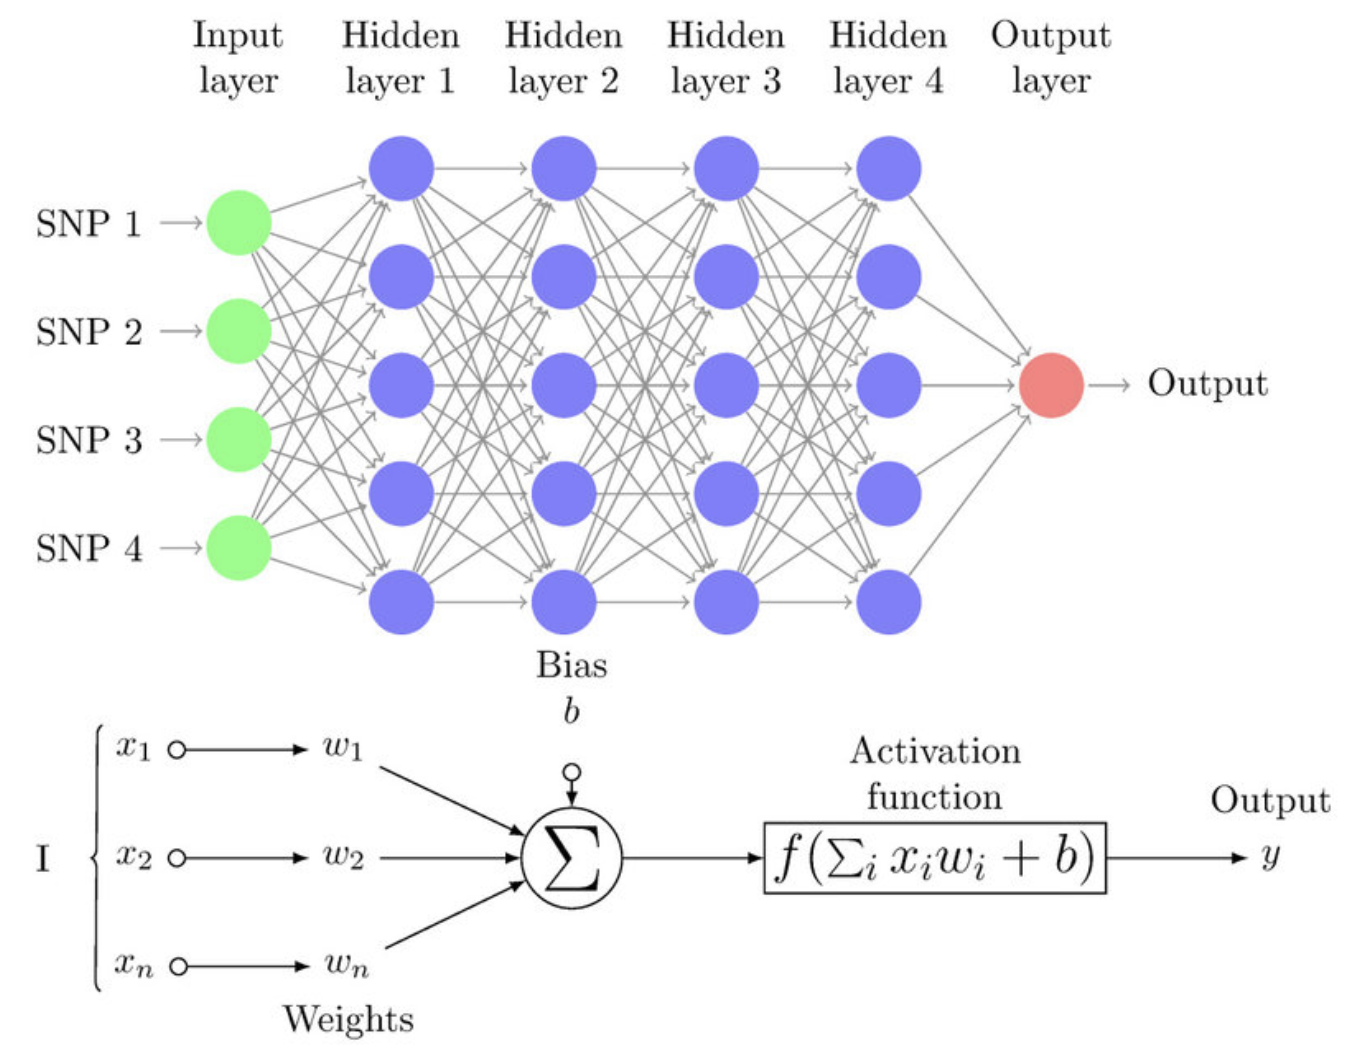

**Data Type at Entry:** Array.

**Data Type at Output:** Array.

In [1]:
import time
import torch
import keras
import numpy as np
import pandas as pd
import torch.nn as nn
from keras.layers import Dense
from keras import regularizers
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import Sequential
from sklearn.model_selection import train_test_split

In [2]:
def print_time_execution(start, end, txt):

  delta = int(end - start)

  hours = int(delta/3_600)
  mins = int((delta - 3_600*hours)/60)
  segs = int(delta - hours*3600 - mins*60)

  return f'{txt} it takes {hours} hours, {mins} mins and {segs} segs.'

In [3]:
def creation_batchs(n_batchs, X_train, y_train):

  N_train = len(X_train)
  N_batch = int(N_train/n_batchs) + 1

  all_X_train = []
  all_y_train = []

  for i in range(n_batchs):

    all_X_train.append(X_train[i*N_batch: (i+1)*N_batch].copy())
    all_y_train.append(y_train[i*N_batch: (i+1)*N_batch].copy())

  return all_X_train, all_y_train

### Start time of execution

In [4]:
start = time.time()

# 1. Regresion Problem

### i. Creacion of Dataset

In [5]:
X = [(i*0.1 - 20) for i in range(1, 400 + 1)]

In [6]:
y = [x**2 for x in X]

In [7]:
df = pd.DataFrame({'X': X, 'y': y})

In [8]:
df['X'] = df['X'].astype('float32')
df['y'] = df['y'].astype('float32')

In [9]:
X = df[['X']].copy()
y = df['y'].copy()

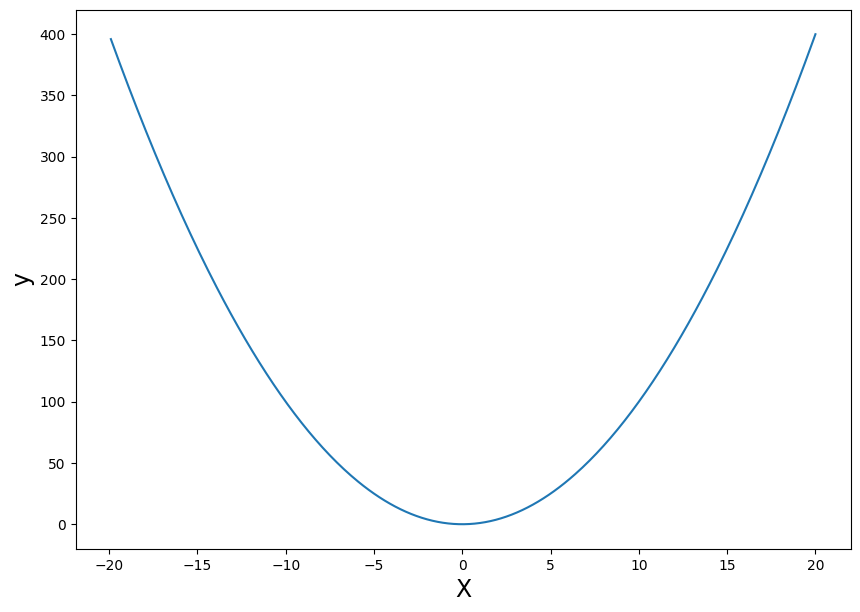

In [10]:
plt.figure(figsize = (10, 7))
plt.xlabel('X', fontsize = 17)
plt.ylabel('y', fontsize = 17)
plt.plot(X, y)
plt.show()

### ii. Split

In [11]:
n_batchs = 2

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.5, random_state = 42)

In [13]:
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5, random_state = 42)

In [14]:
X_train_mean = X_train.mean()
X_train_std = X_train.std()

X_train = (X_train - X_train_mean)/X_train_std
X_val = (X_val - X_train_mean)/X_train_std
X_test = (X_test - X_train_mean)/X_train_std

In [15]:
y_train_mean = y_train.mean()
y_train_std = y_train.std()

y_train = (y_train - y_train_mean)/y_train_std
y_val = (y_val - y_train_mean)/y_train_std
y_test = (y_test - y_train_mean)/y_train_std

In [16]:
all_X_train, all_y_train = creation_batchs(n_batchs, X_train, y_train)

In [17]:
for i in range(n_batchs):
  all_X_train[i] = np.array(all_X_train[i])
  all_y_train[i] = np.array(all_y_train[i])

X_train = np.array(X_train)
y_train = np.array(y_train)

X_val = np.array(X_val)
y_val = np.array(y_val)

X_test = np.array(X_test)
y_test = np.array(y_test)

### iii. Creation of model

In [18]:
def model_keras(input_size, hidden_dim_1, hidden_dim_2, output_size, lr, n_epochs):

  model = Sequential()
  model.add(Dense(hidden_dim_1, activation = 'relu', input_shape = (input_size,)))
  model.add(Dense(hidden_dim_2, activation = 'relu'))
  model.add(Dense(output_size))

  model.compile(optimizer = Adam(learning_rate = lr), loss = 'mse')

  _ = model.fit(X_train, y_train, epochs = n_epochs, batch_size = 100, verbose = 0)

  return model

### iv. Hyperparameter Tuning Jobs

In [19]:
input_size = 1
output_size = 1

all_hidden_dim_1 = [(i*2) for i in range(1, 5 + 1)]
all_hidden_dim_2 = [(i*2) for i in range(1, 5 + 1)]
all_n_epochs = [(i*100) for i in range(1, 5 + 1)]
all_lr = [(i*0.01) for i in range(1, 5 + 1)]

all_params = []

for hidden_dim_1 in all_hidden_dim_1:
  for hidden_dim_2 in all_hidden_dim_2:
    for n_epochs in all_n_epochs:
      for lr in all_lr:
        all_params.append({'hidden_dim_1': hidden_dim_1, 'hidden_dim_2': hidden_dim_2, 'n_epochs': n_epochs, 'lr': lr})

In [20]:
hidden_dim_1_col = []
hidden_dim_2_col = []

n_epochs_col = []
lr_col = []

loss_val_col = []

c = 0

start_iter = time.time()

m = 10

for params in all_params:

  c = c + 1

  hidden_dim_1 = params['hidden_dim_1']
  hidden_dim_2 = params['hidden_dim_2']

  n_epochs = params['n_epochs']
  lr = params['lr']

  model = model_keras(input_size, hidden_dim_1, hidden_dim_2, output_size, lr, n_epochs)

  y_pred_val = (model(X_val)[:, 0]).numpy()

  loss_val = ((y_pred_val - y_val)**2).mean()

  hidden_dim_1_col.append(hidden_dim_1)
  hidden_dim_2_col.append(hidden_dim_2)

  n_epochs_col.append(n_epochs)
  lr_col.append(lr)

  loss_val_col.append(loss_val)

  if (c % m) == 0:

    end_iter = time.time()
    print(f'c = {c}')
    print(print_time_execution(start_iter, end_iter, f'execute {m} iterations'))
    print('-'*70)
    start_iter = time.time()

c = 10
execute 10 iterations it takes 0 hours, 0 mins and 45 segs.
----------------------------------------------------------------------
c = 20
execute 10 iterations it takes 0 hours, 0 mins and 32 segs.
----------------------------------------------------------------------
c = 30
execute 10 iterations it takes 0 hours, 0 mins and 28 segs.
----------------------------------------------------------------------
c = 40
execute 10 iterations it takes 0 hours, 0 mins and 23 segs.
----------------------------------------------------------------------
c = 50
execute 10 iterations it takes 0 hours, 0 mins and 36 segs.
----------------------------------------------------------------------
c = 60
execute 10 iterations it takes 0 hours, 0 mins and 17 segs.
----------------------------------------------------------------------
c = 70
execute 10 iterations it takes 0 hours, 0 mins and 27 segs.
----------------------------------------------------------------------
c = 80
execute 10 iterations it ta

In [21]:
ht = pd.DataFrame()
ht['hidden_dim_1'] = hidden_dim_1_col
ht['hidden_dim_2'] = hidden_dim_2_col
ht['n_epochs'] = n_epochs_col
ht['lr'] = lr_col
ht['loss_val'] = loss_val_col

In [22]:
hidden_dim_1_opt, hidden_dim_2_opt, n_epochs_opt, lr_opt, _ = ht[ht['loss_val'] == ht['loss_val'].min()].iloc[0]

In [23]:
hidden_dim_1_opt = int(hidden_dim_1_opt)
hidden_dim_2_opt = int(hidden_dim_2_opt)
n_epochs_opt = int(n_epochs_opt)

In [24]:
hidden_dim_1_opt, hidden_dim_2_opt, n_epochs_opt, lr_opt

(10, 10, 500, 0.01)

### v. Definitive model

In [25]:
def model_keras_2(input_size, hidden_dim_1, hidden_dim_2, output_size, lr, n_epochs):

  model = Sequential()
  model.add(Dense(hidden_dim_1, activation = 'relu', input_shape = (input_size,)))
  model.add(Dense(hidden_dim_2, activation = 'relu'))
  model.add(Dense(output_size))

  model.compile(optimizer = Adam(learning_rate = lr), loss = 'mse')

  hist = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = n_epochs, batch_size = 100)

  return model, hist

In [26]:
model, hist = model_keras_2(input_size, hidden_dim_1_opt, hidden_dim_2_opt, output_size, lr_opt, n_epochs_opt)

Epoch 1/500
2/2 [==============================] - 1s 197ms/step - loss: 1.0311 - val_loss: 0.9265
Epoch 2/500
2/2 [==============================] - 0s 30ms/step - loss: 0.9177 - val_loss: 0.8206
Epoch 3/500
2/2 [==============================] - 0s 38ms/step - loss: 0.8315 - val_loss: 0.7437
Epoch 4/500
2/2 [==============================] - 0s 54ms/step - loss: 0.7579 - val_loss: 0.6766
Epoch 5/500
2/2 [==============================] - 0s 31ms/step - loss: 0.6899 - val_loss: 0.6092
Epoch 6/500
2/2 [==============================] - 0s 32ms/step - loss: 0.6210 - val_loss: 0.5424
Epoch 7/500
2/2 [==============================] - 0s 32ms/step - loss: 0.5571 - val_loss: 0.4830
Epoch 8/500
2/2 [==============================] - 0s 33ms/step - loss: 0.4956 - val_loss: 0.4287
Epoch 9/500
2/2 [==============================] - 0s 34ms/step - loss: 0.4423 - val_loss: 0.3778
Epoch 10/500
2/2 [==============================] - 0s 34ms/step - loss: 0.3910 - val_loss: 0.3288
Epoch 11/500
2/2 [

In [27]:
all_loss_train = np.array(hist.history['loss'])
all_loss_val = np.array(hist.history['val_loss'])
all_n_epochs = np.array([i for i in range(1, n_epochs_opt + 1)])

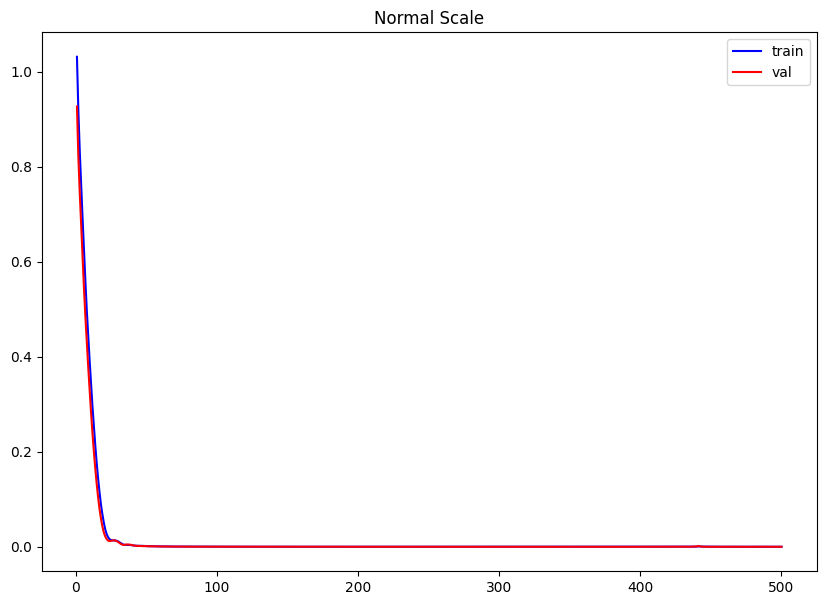

In [28]:
plt.figure(figsize = (10, 7))
plt.title('Normal Scale')
plt.plot(all_n_epochs, all_loss_train, color = 'blue', label = 'train')
plt.plot(all_n_epochs, all_loss_val, color = 'red', label = 'val')
plt.legend()
plt.show()

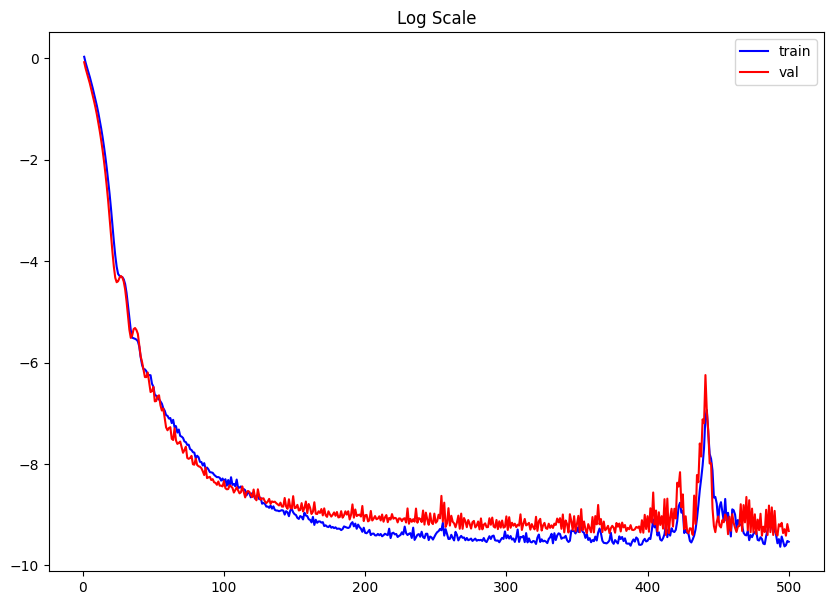

In [29]:
plt.figure(figsize = (10, 7))
plt.title('Log Scale')
plt.plot(all_n_epochs, np.log(all_loss_train), color = 'blue', label = 'train')
plt.plot(all_n_epochs, np.log(all_loss_val), color = 'red', label = 'val')
plt.legend()
plt.show()

### vi. Performance Metrics

In [30]:
X_train_col = X_train[:, 0]
y_train_predict = model(X_train).numpy()[:, 0]

df_train = pd.DataFrame()

df_train['X'] = X_train_col
df_train['y'] = y_train
df_train['y_predict'] = y_train_predict

df_train['X'] = df_train['X']*X_train_std[0] + X_train_mean[0]
df_train['y'] = df_train['y']*y_train_std + y_train_mean
df_train['y_predict'] = df_train['y_predict']*y_train_std + y_train_mean

In [31]:
X_val_col = X_val[:, 0]
y_val_predict = model(X_val).numpy()[:, 0]

df_val = pd.DataFrame()

df_val['X'] = X_val_col
df_val['y'] = y_val
df_val['y_predict'] = y_val_predict

df_val['X'] = df_val['X']*X_train_std[0] + X_train_mean[0]
df_val['y'] = df_val['y']*y_train_std + y_train_mean
df_val['y_predict'] = df_val['y_predict']*y_train_std + y_train_mean

In [32]:
X_test_col = X_test[:, 0]
y_test_predict = model(X_test).numpy()[:, 0]

df_test = pd.DataFrame()

df_test['X'] = X_test_col
df_test['y'] = y_test
df_test['y_predict'] = y_test_predict

df_test['X'] = df_test['X']*X_train_std[0] + X_train_mean[0]
df_test['y'] = df_test['y']*y_train_std + y_train_mean
df_test['y_predict'] = df_test['y_predict']*y_train_std + y_train_mean

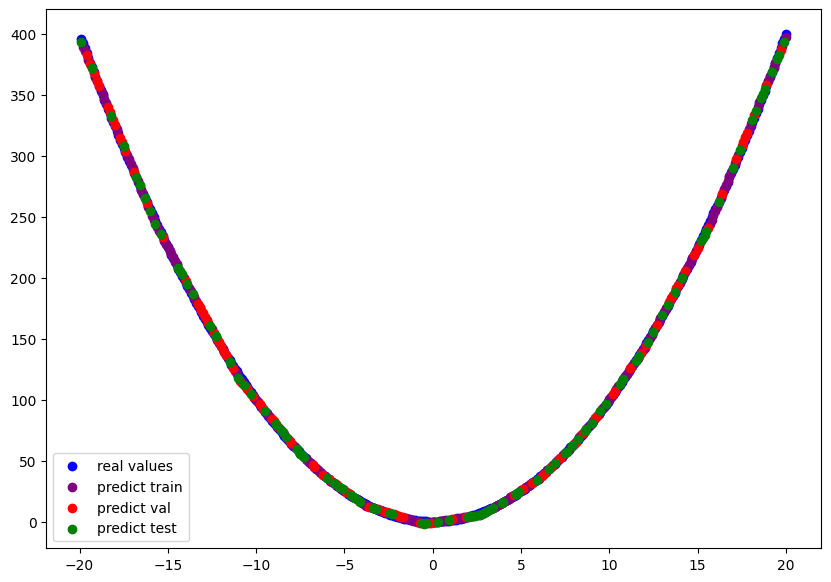

In [33]:
plt.figure(figsize = (10, 7))

plt.scatter(df_train['X'], df_train['y'], color = 'blue', label = 'real values')
plt.scatter(df_val['X'], df_val['y'], color = 'blue')
plt.scatter(df_test['X'], df_test['y'], color = 'blue')

plt.scatter(df_train['X'], df_train['y_predict'], color = 'purple', label = 'predict train')
plt.scatter(df_val['X'], df_val['y_predict'], color = 'red', label = 'predict val')
plt.scatter(df_test['X'], df_test['y_predict'], color = 'green', label = 'predict test')

plt.legend()
plt.show()

In [34]:
mae_train = round(abs(df_train['y_predict'] - df_train['y']).mean(), 2)
mae_val = round(abs(df_val['y_predict'] - df_val['y']).mean(), 2)
mae_test = round(abs(df_test['y_predict'] - df_test['y']).mean(), 2)

print('MAE train: ', mae_train)
print('MAE val: ', mae_val)
print('MAE test: ', mae_test)

MAE train:  0.73
MAE val:  0.93
MAE test:  0.91


### vii. Explainability

In [35]:
!pip install -q shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 7.4 MB/s eta 0:00:00


In [36]:
import shap

In [37]:
def MLP_predict(df_X):

  y_pred = model(df_X).numpy()[:, 0]

  return y_pred

In [38]:
explainer = shap.KernelExplainer(MLP_predict, df_test[['X']])

In [39]:
shap_values = explainer.shap_values(df_test[['X']])

  0%|          | 0/100 [00:00<?, ?it/s]

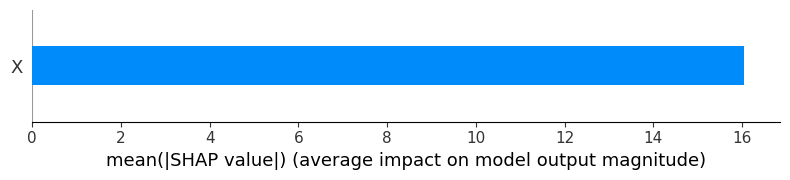

In [40]:
shap.summary_plot(shap_values, df_test[['X']], plot_type = "bar")

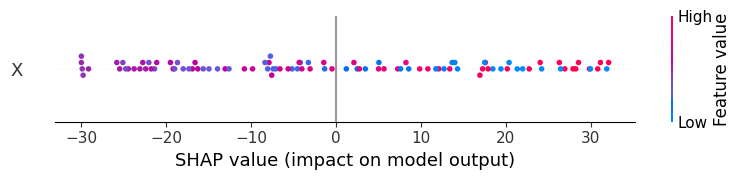

In [41]:
shap.summary_plot(shap_values, df_test[['X']])

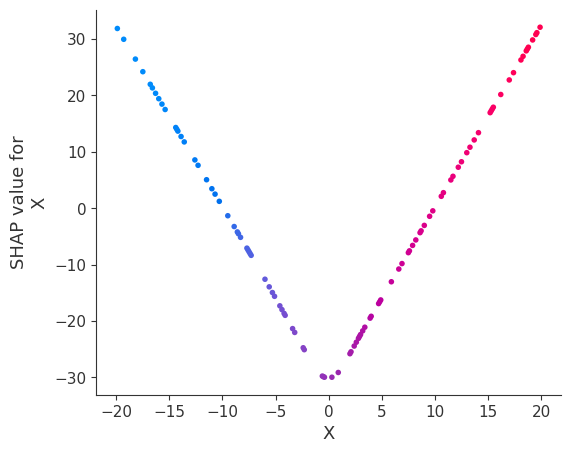

In [42]:
for name in ['X']:
    shap.dependence_plot(name, shap_values, df_test[['X']])

# 2. Classification Problem

### i. Creacion of Dataset

In [43]:
from sklearn.datasets import make_circles, make_classification

In [44]:
X, y = make_classification(
    n_samples = 400, n_features = 2, n_redundant = 0, n_informative = 2, random_state = 1,
    n_clusters_per_class = 2, class_sep = 0.7
)

In [45]:
df = pd.DataFrame()
df['X_1'] = X[:, 0]
df['X_2'] = X[:, 1]
df['y'] = y
df['y_2'] = 1 - df['y']

In [46]:
df['X_1'] = df['X_1'].astype('float32')
df['X_2'] = df['X_2'].astype('float32')
df['y'] = df['y'].astype('float32')
df['y_2'] = df['y_2'].astype('float32')

In [47]:
X = df[['X_1', 'X_2']].copy()
y = df[['y', 'y_2']].copy()

In [48]:
f_0 = (df['y'] == 0)
f_1 = (df['y'] == 1)

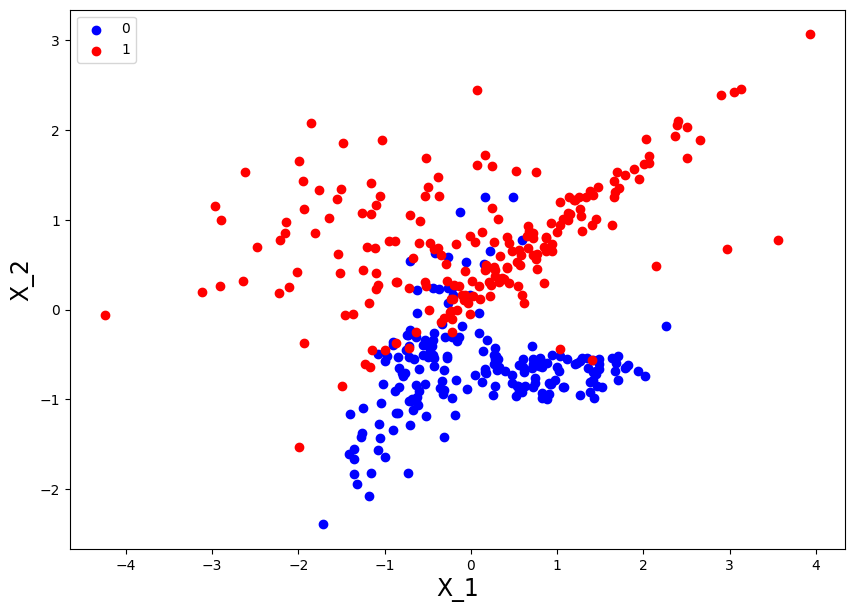

In [49]:
plt.figure(figsize = (10, 7))
plt.xlabel('X_1', fontsize = 17)
plt.ylabel('X_2', fontsize = 17)
plt.scatter(df[f_0]['X_1'], df[f_0]['X_2'], color = 'blue', label = '0')
plt.scatter(df[f_1]['X_1'], df[f_1]['X_2'], color = 'red', label = '1')
plt.legend()
plt.show()

### ii. Split

In [50]:
n_batchs = 2

In [51]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.5, random_state = 42)

In [52]:
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5, random_state = 42)

In [53]:
X_train_mean = X_train.mean()
X_train_std = X_train.std()

X_train = (X_train - X_train_mean)/X_train_std
X_val = (X_val - X_train_mean)/X_train_std
X_test = (X_test - X_train_mean)/X_train_std

In [54]:
all_X_train, all_y_train = creation_batchs(n_batchs, X_train, y_train)

In [55]:
for i in range(n_batchs):
  all_X_train[i] = np.array(all_X_train[i])
  all_y_train[i] = np.array(all_y_train[i])

X_train = np.array(X_train)
y_train = np.array(y_train)

X_val = np.array(X_val)
y_val = np.array(y_val)

X_test = np.array(X_test)
y_test = np.array(y_test)

### iii. Creation of model

In [56]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [57]:
from keras.layers import Softmax

In [58]:
def model_keras(input_size, hidden_dim_1, hidden_dim_2, output_size, lr, n_epochs):

  model = Sequential()
  model.add(Dense(hidden_dim_1, activation = 'relu', input_shape = (input_size,)))
  model.add(Dense(hidden_dim_2, activation = 'relu'))
  model.add(Dense(output_size))
  model.add(Softmax())

  model.compile(optimizer = Adam(learning_rate = lr), loss = 'binary_crossentropy')

  _ = model.fit(X_train, y_train, epochs = n_epochs, batch_size = 100, verbose = 0)

  return model

### iv. Hyperparameter Tuning Jobs

In [59]:
input_size = 2
output_size = 2

all_hidden_dim_1 = [(i*2) for i in range(1, 5 + 1)]
all_hidden_dim_2 = [(i*2) for i in range(1, 5 + 1)]
all_n_epochs = [(i*100) for i in range(1, 5 + 1)]
all_lr = [(i*0.01) for i in range(1, 5 + 1)]

all_params = []

for hidden_dim_1 in all_hidden_dim_1:
  for hidden_dim_2 in all_hidden_dim_2:
    for n_epochs in all_n_epochs:
      for lr in all_lr:
        all_params.append({'hidden_dim_1': hidden_dim_1, 'hidden_dim_2': hidden_dim_2, 'n_epochs': n_epochs, 'lr': lr})

In [60]:
hidden_dim_1_col = []
hidden_dim_2_col = []

n_epochs_col = []
lr_col = []

recall_val_col = []

c = 0

start_iter = time.time()

m = 10

for params in all_params:

  c = c + 1

  hidden_dim_1 = params['hidden_dim_1']
  hidden_dim_2 = params['hidden_dim_2']

  n_epochs = params['n_epochs']
  lr = params['lr']

  model = model_keras(input_size, hidden_dim_1, hidden_dim_2, output_size, lr, n_epochs)

  y_val_pred_prob = model(X_val).numpy()[:, 0]
  y_val_pred = (y_val_pred_prob >= 0.5)*1

  recall_val = recall_score(y_val[:, 0], y_val_pred)

  hidden_dim_1_col.append(hidden_dim_1)
  hidden_dim_2_col.append(hidden_dim_2)

  n_epochs_col.append(n_epochs)
  lr_col.append(lr)

  recall_val_col.append(recall_val)

  if (c % m) == 0:

    end_iter = time.time()
    print(f'c = {c}')
    print(print_time_execution(start_iter, end_iter, f'execute {m} iterations'))
    print('-'*70)
    start_iter = time.time()

c = 10
execute 10 iterations it takes 0 hours, 0 mins and 30 segs.
----------------------------------------------------------------------
c = 20
execute 10 iterations it takes 0 hours, 0 mins and 43 segs.
----------------------------------------------------------------------
c = 30
execute 10 iterations it takes 0 hours, 0 mins and 25 segs.
----------------------------------------------------------------------
c = 40
execute 10 iterations it takes 0 hours, 0 mins and 26 segs.
----------------------------------------------------------------------
c = 50
execute 10 iterations it takes 0 hours, 0 mins and 34 segs.
----------------------------------------------------------------------
c = 60
execute 10 iterations it takes 0 hours, 0 mins and 19 segs.
----------------------------------------------------------------------
c = 70
execute 10 iterations it takes 0 hours, 0 mins and 30 segs.
----------------------------------------------------------------------
c = 80
execute 10 iterations it ta

In [61]:
ht = pd.DataFrame()
ht['hidden_dim_1'] = hidden_dim_1_col
ht['hidden_dim_2'] = hidden_dim_2_col
ht['n_epochs'] = n_epochs_col
ht['lr'] = lr_col
ht['recall_val'] = recall_val_col

In [62]:
hidden_dim_1_opt, hidden_dim_2_opt, n_epochs_opt, lr_opt, _ = ht[ht['recall_val'] == ht['recall_val'].max()].iloc[0]

In [63]:
hidden_dim_1_opt = int(hidden_dim_1_opt)
hidden_dim_2_opt = int(hidden_dim_2_opt)
n_epochs_opt = int(n_epochs_opt)

In [64]:
hidden_dim_1_opt, hidden_dim_2_opt, n_epochs_opt, lr_opt

(2, 2, 100, 0.04)

### v. Definitive model

In [65]:
def model_keras_2(input_size, hidden_dim_1, hidden_dim_2, output_size, lr, n_epochs):

  model = Sequential()
  model.add(Dense(hidden_dim_1, activation = 'relu', input_shape = (input_size,)))
  model.add(Dense(hidden_dim_2, activation = 'relu'))
  model.add(Dense(output_size))
  model.add(Softmax())

  model.compile(optimizer = Adam(learning_rate = lr), loss = 'binary_crossentropy')

  hist = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = n_epochs, batch_size = 100)

  return model, hist

In [66]:
model, hist = model_keras_2(input_size, hidden_dim_1_opt, hidden_dim_2_opt, output_size, lr_opt, n_epochs_opt)

Epoch 1/100
2/2 [==============================] - 1s 156ms/step - loss: 0.6782 - val_loss: 0.6524
Epoch 2/100
2/2 [==============================] - 0s 29ms/step - loss: 0.6404 - val_loss: 0.6165
Epoch 3/100
2/2 [==============================] - 0s 29ms/step - loss: 0.5995 - val_loss: 0.5776
Epoch 4/100
2/2 [==============================] - 0s 30ms/step - loss: 0.5582 - val_loss: 0.5355
Epoch 5/100
2/2 [==============================] - 0s 31ms/step - loss: 0.5177 - val_loss: 0.4918
Epoch 6/100
2/2 [==============================] - 0s 29ms/step - loss: 0.4751 - val_loss: 0.4497
Epoch 7/100
2/2 [==============================] - 0s 31ms/step - loss: 0.4350 - val_loss: 0.4120
Epoch 8/100
2/2 [==============================] - 0s 32ms/step - loss: 0.4037 - val_loss: 0.3804
Epoch 9/100
2/2 [==============================] - 0s 29ms/step - loss: 0.3792 - val_loss: 0.3550
Epoch 10/100
2/2 [==============================] - 0s 51ms/step - loss: 0.3601 - val_loss: 0.3346
Epoch 11/100
2/2 [

In [67]:
all_loss_train = np.array(hist.history['loss'])
all_loss_val = np.array(hist.history['val_loss'])
all_n_epochs = np.array([i for i in range(1, n_epochs_opt + 1)])

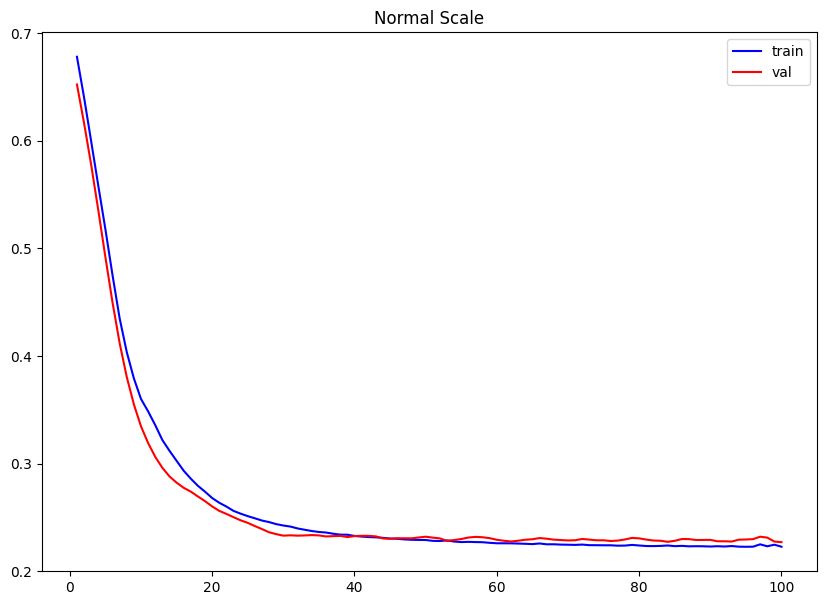

In [68]:
plt.figure(figsize = (10, 7))
plt.title('Normal Scale')
plt.plot(all_n_epochs, all_loss_train, color = 'blue', label = 'train')
plt.plot(all_n_epochs, all_loss_val, color = 'red', label = 'val')
plt.legend()
plt.show()

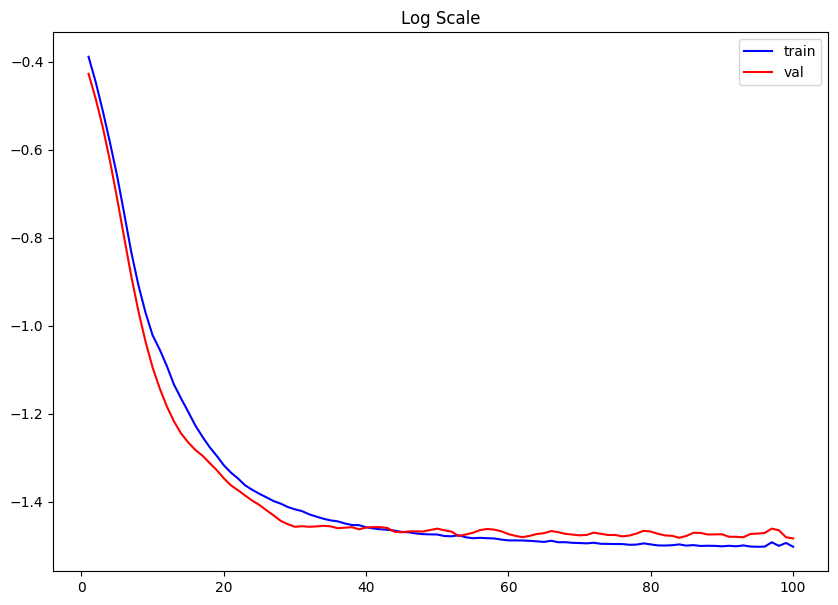

In [69]:
plt.figure(figsize = (10, 7))
plt.title('Log Scale')
plt.plot(all_n_epochs, np.log(all_loss_train), color = 'blue', label = 'train')
plt.plot(all_n_epochs, np.log(all_loss_val), color = 'red', label = 'val')
plt.legend()
plt.show()

### vi. Performance Metrics

In [70]:
y_train_pred_prob = model(X_train).numpy()[:, 0]
y_train_pred = (y_train_pred_prob >= 0.5)*1
recall_train = round(recall_score(y_train[:, 0], y_train_pred)*100, 2)
precision_train = round(precision_score(y_train[:, 0], y_train_pred)*100, 2)

In [71]:
y_val_pred_prob = model(X_val).numpy()[:, 0]
y_val_pred = (y_val_pred_prob >= 0.5)*1
recall_val = round(recall_score(y_val[:, 0], y_val_pred)*100, 2)
precision_val = round(precision_score(y_val[:, 0], y_val_pred)*100, 2)

In [72]:
y_test_pred_prob = model(X_test).numpy()[:, 0]
y_test_pred = (y_test_pred_prob >= 0.5)*1
recall_test = round(recall_score(y_test[:, 0], y_test_pred)*100, 2)
precision_test = round(precision_score(y_test[:, 0], y_test_pred)*100, 2)

In [73]:
print('Recall train:', recall_train)
print('Precision train:', precision_train)

print('\n')

print('Recall val:', recall_val)
print('Precision val:', precision_val)

print('\n')

print('Recall test:', recall_test)
print('Precision test:', precision_test)

Recall train: 96.0
Precision train: 92.31


Recall val: 98.04
Precision val: 89.29


Recall test: 86.27
Precision test: 88.0


### vii. Explainability

In [74]:
!pip install -q shap

In [75]:
import shap

In [76]:
def MLP_predict(df_X):

  y_pred = model(np.array(df_X)).numpy()[:, 0]

  return y_pred

In [77]:
df_test = pd.DataFrame()

In [78]:
df_test['X_1'] = X_test[:, 0]
df_test['X_2'] = X_test[:, 1]

In [79]:
explainer = shap.KernelExplainer(MLP_predict, df_test[['X_1', 'X_2']])

In [80]:
shap_values = explainer.shap_values(df_test[['X_1', 'X_2']])

  0%|          | 0/100 [00:00<?, ?it/s]

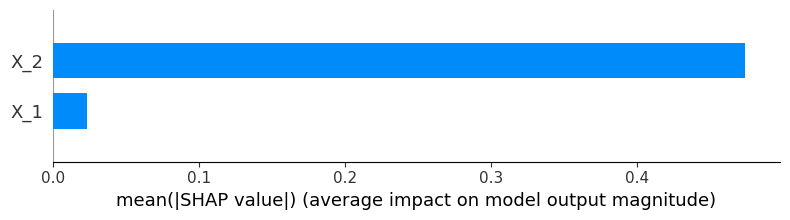

In [81]:
shap.summary_plot(shap_values, df_test[['X_1', 'X_2']], plot_type = "bar")

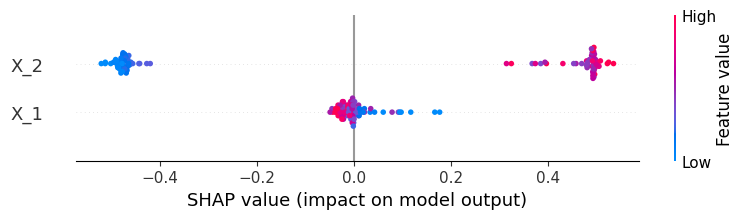

In [82]:
shap.summary_plot(shap_values, df_test[['X_1', 'X_2']])

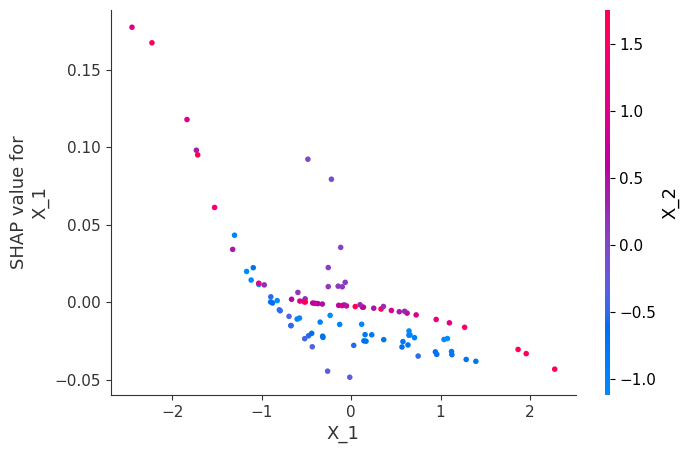

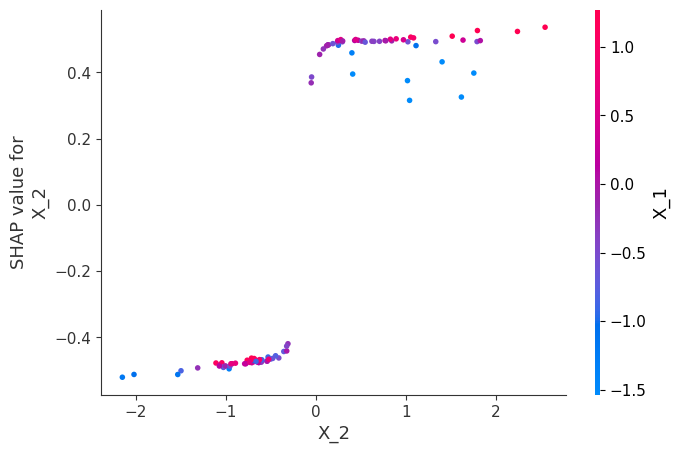

In [83]:
for name in ['X_1', 'X_2']:
    shap.dependence_plot(name, shap_values, df_test[['X_1', 'X_2']])

### End time of execution

In [84]:
end = time.time()

In [85]:
print(print_time_execution(start, end, 'notebook execution'))

notebook execution it takes 1 hours, 0 mins and 1 segs.
